<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY-9163-ML-cyber/blob/main/Lab/LR_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Logistic regression review](#scrollTo=Z7_pq0FUN8Qg)

>>[Intro to LR](#scrollTo=Z7_pq0FUN8Qg)

>>[LR Objective function](#scrollTo=Z7_pq0FUN8Qg)

>>[Gradient descent](#scrollTo=Z7_pq0FUN8Qg)

>>[Convergence analysis of GD](#scrollTo=Z7_pq0FUN8Qg)

>[Lab](#scrollTo=9v-QTslU4f3s)

>>[Import packages](#scrollTo=cQvHXbg55_9u)

>>[understand the dataset](#scrollTo=Q7lsQQAN6hrH)

>>>[Attribute Information:](#scrollTo=NGOsZkRU8NDh)

>>>>[bank client data:](#scrollTo=NGOsZkRU8NDh)

>>>>[related with the last contact of the current campaign:](#scrollTo=NGOsZkRU8NDh)

>>>>[other attributes:](#scrollTo=NGOsZkRU8NDh)

>>>>[social and economic context attributes](#scrollTo=NGOsZkRU8NDh)

>>[SMOTE](#scrollTo=BfTLnjywEyLF)




#Logistic regression review

## Intro to LR

LR 是很重要的模型，教授在课上也给我们认真地讲过了，这里就把过程以及推论都给详细地写一下

LR是一个很经典的二分类的分类方法，在工业界中，LR也是经常使用的，非常重要，面试也是经常考的，所以我们要去了解怎么推导LR，了解LR的objective function，了解在LR模型下怎么避免overfitting，LR的框架。LR一般都可以作为baseline

在很多场景下都是可以用LR的，比如说
* 贷款违约情况(会/不会)
* 广告点击问题，也就是CTR prediction
* 商品推荐
* 情感分析
* 疾病诊断
* 等等

我们来看一个例子，是一个classification problem，这是一个二分类的问题

现在有这么一个数据

| Age      | Salary | Education      | If Breach of contract |
| :----: | :----: | :----: | :----: |
| 20      | 4000       | undergrad      | Yes     |
| 25   | 5000        | college      | No      |
| 21      | 6000       | undergrad     | No      |
| 25   | 5000       | college     | Yes      |
| 28      | 8000      | undergrad      | No       |
| 27  | 7000        | undergrad      | ?      |

学习输入到输出的映射 $f:X→ Y$

$X$就是我们的属入

$Y$就是我们的输出

这里呢，其实我们也就是想求这么一个概率，也就是$P(Y|X)$。

那我们现在思考一个问题，就是我们可不可以用线性回归来表示$P(Y|X)=w^Tx+b$? 为什么？

当然是不可以了
* 因为$P(Y|X)$是条件概率，它的范围是[0,1]
* 其次就是所有类的概率加起来是1，也就是$∑_y P(Y|X)=1$.
* 而线性回归的范围是(-∞,+∞)

那我们可不可以把线性回归的$w^Tx+b$给映射到[0,1]呢？于是我们就想到了logistic function，也就是
$$
y=\frac{1}{1+e^{-z}}, z=w^Tx+b
$$
它的图像如下图所示

<img src="https://user-images.githubusercontent.com/68700549/147372757-b5acd7b2-7096-4401-b178-bc4bd07e9ce1.png" width="300" height="200" />

于是，我们LR model的decision function就是
$$
P(Y|X)=y=\frac{1}{1+e^{-z}}, z=w^Tx+b
$$

我们现在回到开头提的classification problem，假设模型已经训练好，那么我们可以得到
$$
\begin{gathered}
P(Y=\text{Yes}|(27,7000, \text{undergrad}))=\frac{1}{1+e^{-[\begin{bmatrix}w_1,w_2,w_3\end{bmatrix}\begin{bmatrix}27\\7000\\ \text{undergrad}  \end{bmatrix}+b]}}
\end{gathered}
$$

就是这样的一种形式，然后我们看概率，设置threshold，然后就可以知道是Yes还是No了。

对于二分类问题，我们有
$$
\begin{gathered}
P(y=1|x,w)=\frac{1}{1+e^{-w^Tx+b}}\\P(y=0|x,w)=1-P(y=1|x,w)=\frac{e^{-w^Tx+b}}{1+e^{-w^Tx+b}}
\end{gathered}
$$

上述的两个式子是可以合并成
$$
p(y|x,w)=P(y=1|x,w)^y[1-P(y=1|x,w)]^{1-y}
$$

这里我们思考一个问题，就是LR是线性分类器还是非线性分类器？

答案就是LR是线性分类器。怎么看呢？我们就要去看其决策边界，decision boundary

<img src="https://user-images.githubusercontent.com/68700549/147388134-83139c33-1aca-441d-813b-aa67ea01a843.png" width="427" height="159" />

那么怎么看LR的decision boundary呢？这里呢，有一个假设，假设是二分类的情况，如果是线性分类器的话，就是落在每一边的概率是一样的。于是，对LR来说，就有
$$
\frac{P(y=1|x,w)}{P(y=0|x,w)}=1
$$

于是，我们可以得到$e^{-(w^Tx+b)}=1$，两边加ln，可以得到$lne^{-(w^Tx+b)}=ln1$. 于是可以得到$-(w^Tx+b)=0$, 也就是$w^Tx+b=0$,这也就是LR的decision boundary了，所以，LR的decision boundary是线性的，也就说明了LR是linear classifier。


## LR Objective function

就是我们要去求解$w,b$. LR要优化的函数是最大似然，maximum likelihood。也就是要最大化见到样本的概率。

假设我们拥有数据集$D=\{(x_i,y_i)\}_{i=1}^n,x_i∈ 𝙍^d, y_i∈ \{0,1\}$.

而且，我们已经定义了
$$
p(y|x,w)=P(y=1|x,w)^y[1-P(y=1|x,w)]^{1-y}
$$

我们需要最大化目标函数， MLE=maximum likelihood estimation
$$
\hat{w}_{MLE},\hat{b}_{MLE}=argmax_{w，b} ∏_{i=1}^n p(y_i|x_i,w,b)
$$

所以，在LR中，其实我们是需要考虑所有的样本数据的，我们要去寻找$w,b$使得$∏_{i=1}^n p(y_i|x_i,w,b)$最大化。

接下来我们来看看怎么最大化目标函数,一般来说，我们看到连乘，$∏$,我们就要考虑加上log，log又是单调递增函数，而且会使得连乘运算变得简单
$$
\begin{gathered}
\hat{w}_{MLE},\hat{b}_{MLE}=argmax_{w，b} ∏_{i=1}^n p(y_i|x_i,w,b)\\=argmax_{w,b}log(∏_{i=1}^n p(y_i|x_i,w,b))\\=argmax_{w,b}\sum_{i=1}^n log P(y_i|x_i,w,b)\\=argmin_{w,b}-\sum_{i=1}^n log P(y_i|x_i,w,b)\\=argmin_{w,b}-\sum_{i=1}^n log[P(y_i=1|x,w)^y[1-P(y_i=1|x,w)]^{1-y_i}] \\=argmin_{w,b}-\sum_{i=1}^n y_ilog P(y_i=1|x_i, w,b)+(1-y_i)log[1-P(y_i=1|x_i,w,b)]
\end{gathered}
$$

这也就是LR 的objective function，一定要记住，也要去理解这是怎么来的

## Gradient descent

我们已经知道了LR 的objective function，接下来就是要知道怎么去优化。在了解怎么优化之前，我们先了解什么是凸函数，上课讲过的，不难理解。我们现在要知道得到的是全局最优解还是局部最优解
<img src="https://user-images.githubusercontent.com/68700549/147388993-10fbc081-c530-4340-8e1f-63cacd520400.png" width="506" height="179" />

典型的非凸就是神经网络

判断一个函数是否是凸函数，就需要看这个函数是否满足
$$
f(λx_1+(1-λ)x_2) ≤ λf(x_1)+(1-λ)f(x_2)
$$

<img src="https://user-images.githubusercontent.com/68700549/147389044-b44655d7-1189-4e01-adfe-f09710bf0e20.png" width="506" height="179" />

常见的convex function有
* 线性函数: $f(x)=a^Tx+b$
* 二次函数: $f(x)=x^TQx+a^Tx+b$, $Q∈ S_+^n$
* least square: $f(x)=||Ax-b||_2^2$
* p-norm: $f(x)=(∑_{i=1}^n|x_i|^p)^{\frac{1}{p}}$, $p ≥ 1$
* log-sum-exp function: $f(x)=log(∑_{i=1}^n e^{x_i}),x\in R^n$


GD的过程很简单，不难，它的伪代码如下



```
# GD pseudocode
Init w_1
for t=1,2...
  w^{t+1}=w^t-η▽f(w^t)

```


logistic regression本身也是凸函数的


接下来我们要看看如何用GD来求解LR model的最优解，我们一直LR的objective function为
$$
argmin_{w,b}-\sum_{i=1}^n y_ilog P(y_i=1|x_i, w,b)+(1-y_i)log[1-P(y_i=1|x_i,w,b)]
$$

接下来我们就要对其进行求导，我们令$L(w,b)=-\sum_{i=1}^n y_ilog P(y_i=1|x_i, w,b)+(1-y_i)log[1-P(y_i=1|x_i,w,b)$

于是，我们对其进行求导. 我们知道sigmoid函数的求导就是 $σ'(x)=σ(x)[1-σ(x)]$. 我们先对$w$进行求导

$$
\begin{gathered}
\frac{∂ L(w,b)}{\partial w}=-∑_{i=1}^n y_i \frac{σ (w^Tx_i+b)[1-σ (w^Tx_i+b)]}{σ (w^Tx_i+b)}x_i+(1-y)\frac{σ (w^Tx_i+b)[1-σ (w^Tx_i+b)]}{1-σ (w^Tx_i+b)}x_i\\ = -∑_{i=1}^n y_i (1-σ (w^Tx_i+b))x_i + (y-1)σ (w^Tx_i+b)x_i\\ = -∑_{i=1}^n [y_i -σ (w^Tx_i+b)]x_i\\ = ∑_{i=1}^n [σ (w^Tx_i+b)-y_i]x_i
\end{gathered}
$$

我们可以看到LR在做GD的时候，总是在预测值和真实值中做比较，也就是$σ (w^Tx+b)-y_i$

现在我们再来对$b$进行求导

$$
\begin{gathered}
\frac{∂ L(w,b)}{\partial b}=-∑_{i=1}^n y_i \frac{σ (w^Tx_i+b)[1-σ (w^Tx_i+b)]}{σ (w^Tx_i+b)}+(1-y)\frac{σ (w^Tx_i+b)[1-σ (w^Tx_i+b)]}{1-σ (w^Tx_i+b)}\\ = -∑_{i=1}^n y_i (1-σ (w^Tx_i+b)) + (y-1)σ (w^Tx_i+b)\\ = -∑_{i=1}^n [y_i -σ (w^Tx_i+b)]\\ = ∑_{i=1}^n [σ (w^Tx_i+b)-y_i]
\end{gathered}
$$

那么，GD在什么时候停止iteration呢？有以下几种方法
* $|L^t(w,b)-L^{t+1}(w,b)|<ϵ$
* $|w^t-w^{t+1}|<ϵ$
* check validation set accuracy, early stopping
* fixed itertions

我们思考一下如果用GD，会有什么问题？我们看到我们更新参数时，总是有$∑_{i=1}^n$, 也就是说总是要循环所有的样本，在大数据的情况下，效率会慢。于是我们需要考虑新的方法，也就是stochastic GD。 SGD也就是每次随机更新一个样本，这样也能够有效地避免saddle point，也减少了计算量. GD和SGD的pseudocode如下图所示。


<img src="https://user-images.githubusercontent.com/68700549/147393452-1f01bacf-e1d2-43d3-b35d-b51dc2cead43.jpg" width="506" height="433" />

我们可以看到，SGD是更新非常频繁的，每看到一个样本，都要去计算一下其误差。GD的话是$∑$, 也就是假设有$n$个样本，我要把这$n$个样本都给$∑$一下，才会更新其参数。SGD的话是每个样本，就单个样本进行更新，这样计算效率就会加快，但是也有缺点，就是数据中是存在噪声的，这样会导致更新不准确，于是需要使用较小的learning rate，而GD是可以使用较大的learning rate的。 SGD是经常使用的，所以我们一定要知道是怎么work的。

SGD每次更新一个样本也是较慢的，于是就有了mini-batch SGD，也就是每次随机地从$n$个sample中取$m$个数据，一般取32,64,128。这样我们就可以用来更新$w,b$了， pseudocode如下图所示

<img src="https://user-images.githubusercontent.com/68700549/147393630-e2ee41b4-6115-4cbb-b7cc-a9bbfcbecc03.jpg" width="506" height="192" />

Mini-batch的优势在于不用考虑所有的样本，比起SGD也相对比较稳定，因为不是考虑一个样本，而是同时考虑多个样本

## Convergence analysis of GD

有一个**定理**我们需要理解，就是

假设函数满足L-Lipschitz条件，并且是凸函数，设定$x^*=argminf(x)$,那么对于learning rate $η≤ \frac{1}{L}$, 这里呢，$L$ is constant, 满足
$$
f(x_k)≤ f(x^*)+\frac{||x_0-x^*||^2}{2η_t k}
$$

当我们迭代$k=\frac{L||x_0-x^*||^2}{ϵ}$次之后，我们就可以保证得到 $ϵ$- approximtion optimal value $x (η_t=\frac{1}{L})$

这里呢，我们需要知道的是Logistic regression，linear regression都是满足L-Lipschitz条件的，LR的 objective function是凸函数，我们需要理解上面这个定理. $x_k$表示的是第$k$次迭代时$x$的值，其实，$\frac{||x_0-x^*||^2}{2η_t k}$就是与最优解的差值，如果这个数值越来越小并且变小的速度快的话，说明不需要这么多的iteration。

我们先来理解一下这个定理，就是$ϵ$ approximation是什么意思。我们有这个公式，就是
$$
f(x_k)≤ f(x^*)+\frac{||x_0-x^*||^2}{2η_t k}
$$

我们知道$||x_0-x^*||^2$是不变的，learning rate $η$也是固定的，唯独有变化的就是这个$k$,这个$k$表示的意思就是iterate了多少次，随着iteration次数的增加，$\frac{||x_0-x^*||^2}{2η_t k}$的值也在减小，说明$f(x_k)$和$f(x^*)$也在接近。现在我们知道$k==\frac{L||x_0-x^*||^2}{ϵ}$,并且$η_t=\frac{1}{L}$, 我们代进去，可以得到
$$
\begin{gathered}
\frac{||x_0-x^*||^2}{2η_t k}=\frac{||x_0-x^*||^2}{2η_t \frac{L||x_0-x^*||^2}{ϵ}}=\frac{ϵ}{2 η_t L}\\=\frac{ϵ}{2 η_t \frac{1}{η_t}}=\frac{ϵ}{2}
\end{gathered}
$$

于是，我们就可以得到
$$
\begin{gathered}
f(x_k)≤ f(x^*)+\frac{||x_0-x^*||^2}{2η_t k}\\=f(x^*)+O(ϵ)
\end{gathered}
$$

现在我们来讲**L-Lipschitz**条件与定理

claim 1，也就是一个光滑函数(smooth function) $f$ 满足L-Lipschitz条件，则对于任意$x,y∈ R^d$,我们有
$$
||\triangledown f(x)-\triangledown f(y)|| ≤ L||x-y||
$$

这里呢，$L$是一个constant。


claim 2，我们还需要了解还有一个**定理**

就是假设一个函数满足L-Lipschitz条件，并且是凸函数，对于任意$x,y∈ R^d$, 我们有
$$
f(x)≤ f(x) + \triangledown f(x)(y-x)+\frac{L}{2}||y-x||^2
$$

通过Claim 2, 而且我们又有Gradient descent，我们有$x_{i+1}=x_i-η_t \triangledown f(x_i)$, 而且，在最上面的定理中，我们有$η ≤ \frac{1}{L}$, 代进去, 我们可以得到
$$
\begin{gathered}
f(x_{i+1})≤f(x_i)+\triangledown f(x_i)(x_{i+1}-x_i)+\frac{L}{2}||x_{i+1}-x_i||^2\\=f(x_i)+\triangledown f(x_i)(-1)η_t \triangledown f(x_i)+\frac{L}{2} η_t^2 \triangledown f(x_i)^2\\=f(x_i)-η_t ||\triangledown f(x_i)||^2 + \frac{L η_t^2}{2}||\triangledown f(x_i)||^2\\=f(x_i)-η_t(1-\frac{L η_t}{2})||\triangledown f(x_i)||^2\\ ≤ f(x_i)-\frac{η_t}{2}||\triangledown f(x_i)||^2
\end{gathered}
$$

于是，我们可以得到
$$
f(x_{i+1})≤ f(x_i)-\frac{η_t}{2}||\triangledown f(x_i)||^2
$$





















# Lab

学习了LR 模型，我们就要在数据中来理解一下LR

这个数据呢，是要我们预测银行客户是否会开设定期存款账户

In [1]:
!wget 'https://raw.githubusercontent.com/GreedyAIAcademy/Machine-Learning/master/3.LinearRegression.LogisticRegression/LogisticRegression/banking.csv' Logistic_bank_data.csv

--2021-12-26 04:01:35--  https://raw.githubusercontent.com/GreedyAIAcademy/Machine-Learning/master/3.LinearRegression.LogisticRegression/LogisticRegression/banking.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4841729 (4.6M) [text/plain]
Saving to: ‘banking.csv’

banking.csv         100%[===================>]   4.62M  --.-KB/s    in 0.05s   

2021-12-26 04:01:35 (84.8 MB/s) - ‘banking.csv’ saved [4841729/4841729]

--2021-12-26 04:01:35--  http://logistic_bank_data.csv/
Resolving logistic_bank_data.csv (logistic_bank_data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘logistic_bank_data.csv’
FINISHED --2021-12-26 04:01:35--
Total wall clock time: 0.5s
Downloaded: 1 files, 4.6M in 0.05s (84.8 MB/s)


## Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## understand the dataset

so, we know that there are 41188 data points and 20 features and the last one is the prediction.

In [4]:
df = pd.read_csv('banking.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


we can actually print the columns names out and know what are they.

In [7]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


### Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)


20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [8]:
# It probably has nan value, we just drop them
df = df.dropna()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


We can take a look at the ['education'] values. We can see that there are 8 different values. Sometimes, when we see these string values, we may consider that if we can combine some of them to make it easier. And here, we may combine 'basic.4y', 'basic.6y', 'basic.9y' into one since they belong to 'basic'. So, we can change them to 'basic'

In [9]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [10]:
df['education'] = np.where(df['education'] == 'basic.4y', 'basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.6y', 'basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.9y', 'basic', df['education'])

check df['education'] unique values again. We can see that we combine all 'basic.4y', 'basic.6y', 'basic.9y' into one. There are 5 different values now which is much easier.

In [11]:
df['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

Before we start to analysis the data, we always need to check the distribution of dataset

In [12]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

We can see that the data is unbalanced. And we can count how many percentage of '1' (agree to set an account) and how many percentage of '0' (don't want to set up an account)

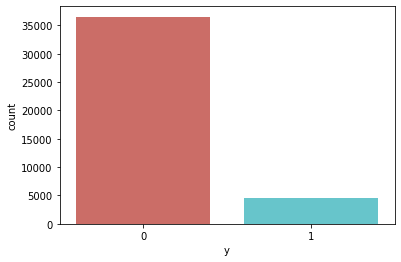

In [15]:
sns.countplot(x='y', data=df, palette='hls')
plt.show()

In [18]:
count_no_account = len(df[df['y']==0])
count_account = len(df[df['y']==1])
percentage_of_no_account = count_no_account/(count_no_account+count_account)
print("percentage of no account: ", percentage_of_no_account)
print("percentage of setting up an account: ", 1-percentage_of_no_account)

36548
percentage of no account:  0.8873458288821987
percentage of setting up an account:  0.1126541711178013


We may check the data by average based on different group to have a deep understanding of data

In [20]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


We can also visualize them. For each features, we can have similar things, just to understand the data. For example, which feature is not good to use to predict.

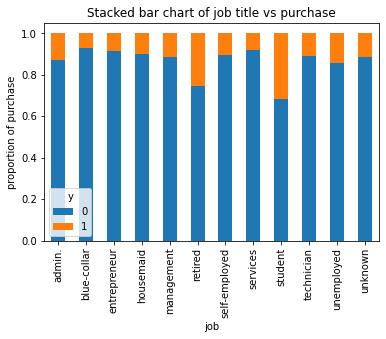

In [21]:
%matplotlib inline
table = pd.crosstab(df.job,df.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar chart of job title vs purchase')
plt.xlabel('job')
plt.ylabel('proportion of purchase')
plt.show()

## SMOTE